# Maximum Likelihood Estimation

Logistic Regression에서 weights값들을 학습시키는 방법을 기술합니다. <br>
Maximum Likelihood는 예를 들어서 y의 값이 1이라면, 1에 최대한 수렴하는 예측값을 내놓도록 최대화하는 것이 목표입니다. 

### Likelihood

Sum-squred error 에서 cost값을 낮추려고 하였습니다. <br>
Logistic Regression에서 사용되는 cost function을 알기 위해서는 Likelihood를 먼저 알아야 하고, <br>
Likelihood는 sum-squred error와는 다르게 maximize해야 합니다. 

<i class="fa fa-exclamation-circle" aria-hidden="true" style="color:#777;"> 여기서 bold체는 series (list)입니다.</i>

### $$ L(\mathbf{w}) = P(\mathbf{y}\ |\ \mathbf{x};\mathbf{w}) = \prod^n_{i=1} P(y^{(i)}\ |\ x^{(i)}; \mathbf{w}) = \prod^n_{i=1} \left( \phi(z^{(i)} \right)^{y^{(i)}} \left(1 - \phi(z^{(i)}) \right)^{1-y^{(i)}} $$

### Log-Likelihood function

실제로는 likelihood가 그대로 쓰이는 경우는 없고, 계산의 편의상 log-likelihood를 사용하는 경우가 일반적입니다.

* log (natural)를 붙임으로서 numerical underflow (likelihood값이 너무 작을때 발생) 를 낮춰줍니다.
* product of factors 를 summation of factors로 바꿔줌으로서, derivative를 구할때 좀더 쉽게 계산할수 있도록 해줍니다.


### $$ l(\mathbf{w}) = \ln L(\mathbf{w}) = \sum^n_{i=1} \ln \left( \phi(z^{(i)}) \right) + \left(1 - y^{(i)} \right) \ln \left( 1 - \phi(z^{(i)}) \right) $$

In [1]:
%pylab inline
from sympy import *
import numpy as np
from sklearn import datasets

Populating the interactive namespace from numpy and matplotlib


### Data Preparation

In [2]:
data = np.loadtxt('../../data/basic_csv_data/binary.csv', delimiter=',', skiprows=1)

Y = data[:, 0] # 0:불합격, 1:합격 
X = data[:, 1:] # GRE, GPA, Rank

X[:, 0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X[:, 1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
X[:, 2] = (X[:,2] - X[:,2].mean()) / X[:,2].std()

### Implement Logistic Regression

In [77]:
class LogisticRegression(object):
    
    def __init__(self):
        self.w = np.random.rand(3+1)
        
    def predict(self, X):
        return np.array([self.phi(x) for x in X])

    def phi(self, x):
        return self.sigmoid(self.w[1:].dot(x) + self.w[0])
        
    def sigmoid(self, x):
        return 1./(1 + np.exp(-x))

    def likelihood(self, Z, Y):
        return np.prod(Z**Y * (1.-Z)**(1-Y))
    
    def log_likelihood(self, Z, Y):
        return np.sum(np.log(Z) + (1 - Y) * np.log(1 - Z))

### Just calculate likelihood & log-likelihood

likelihood의 경우는 numeric underflow가 심하게 나타납니다.
------------------------------------------------------------
likelihood:	5.78035489667e-163
log-likelihood:	-569.985868946


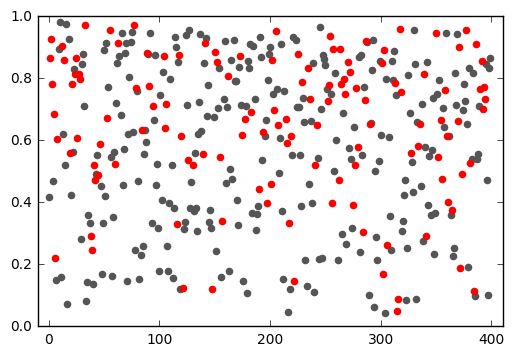

In [94]:
instance = LogisticRegression()
predicted_y = instance.predict(X)

plot_x = np.arange(len(Y))
xlim(-10, len(Y) + 10)
ylim(0, 1)
scatter(plot_x[Y == 0], predicted_y[Y == 0], color='#555555')
scatter(plot_x[Y == 1], predicted_y[Y == 1], color='red')

print u'likelihood의 경우는 numeric underflow가 심하게 나타납니다.'
print '-'*60
print 'likelihood:\t', instance.likelihood(predicted_y, Y)
print 'log-likelihood:\t', instance.log_likelihood(predicted_y, Y)